# Multiple Linear Regression on Economic Dataset

**Multiple Linear Regression** - More than one feature

## The Dataset
This dataset's main purpose is to be used to predict the index price.
**Index Price** - A statistical measure showing the average change in prices for a basket of goods and services over time, serving as a key tool to gauge inflation or deflation, track changes in purchasing power, and guide economic policy. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [18]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df.shape

(24, 6)

In [6]:
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [8]:
df["year"].unique()

array([2017, 2016])

In [9]:
df["month"].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [11]:
df["interest_rate"].unique()

array([2.75, 2.5 , 2.25, 2.  , 1.75])

In [12]:
df["unemployment_rate"].unique()

array([5.3, 5.4, 5.6, 5.5, 5.7, 5.9, 6. , 5.8, 6.1, 6.2])

In [13]:
df["index_price"].unique()

array([1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130,
       1075, 1047,  965,  943,  958,  971,  949,  884,  866,  876,  822,
        704,  719])

In [14]:
#Iterating through all columns and getting their unique values
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

Unnamed: 0: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

year: [2017 2016]

month: [12 11 10  9  8  7  6  5  4  3  2  1]

interest_rate: [2.75 2.5  2.25 2.   1.75]

unemployment_rate: [5.3 5.4 5.6 5.5 5.7 5.9 6.  5.8 6.1 6.2]

index_price: [1464 1394 1357 1293 1256 1254 1234 1195 1159 1167 1130 1075 1047  965
  943  958  971  949  884  866  876  822  704  719]



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


In [19]:
# First I wiull drop the uknwo columns as I don't know what its values represent
# I will also drop year and month as they are not relevent when trying to predict the index_price
df = df.drop(columns = ["Unnamed: 0", "year", "month"], axis = 1)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


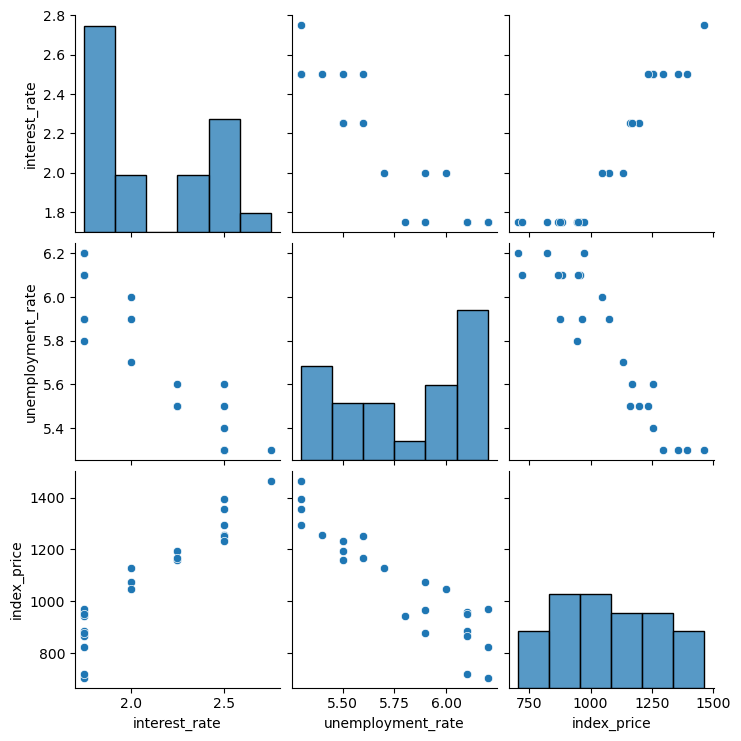

In [20]:
 sns.pairplot(df)

<Axes: >

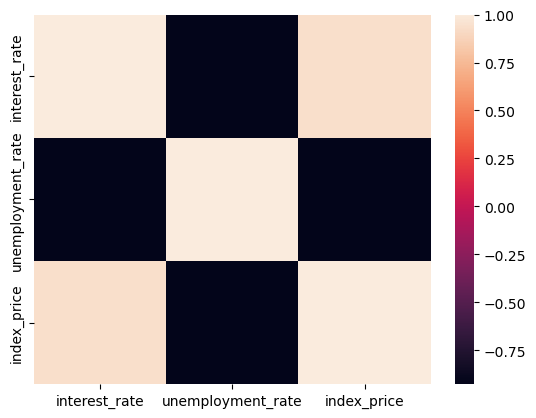

In [21]:
sns.heatmap(df.corr())

In [22]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

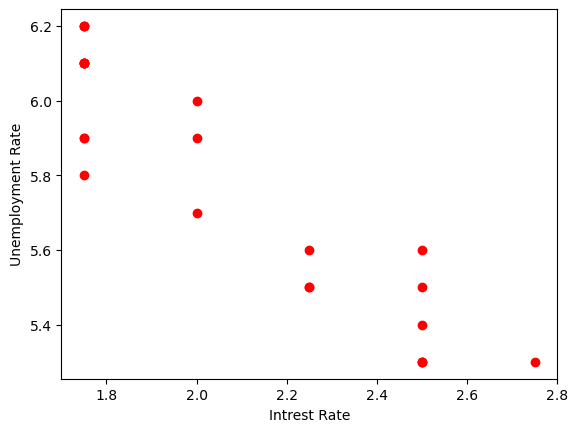

In [26]:
#Visualizing the datapoints more closely
plt.scatter(df["interest_rate"], df["unemployment_rate"], color = "r")
plt.xlabel("Intrest Rate")
plt.ylabel("Unemployment Rate")

In [27]:
# Creating the independent and deprendent variables
X = df[["unemployment_rate", "interest_rate"]]
y = df["index_price"]
# X = df.iloc[:, :-1] #Gets all columns but the last
# y = df.iloc[:, -1] #Gets only the last column

In [28]:
# Creating the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

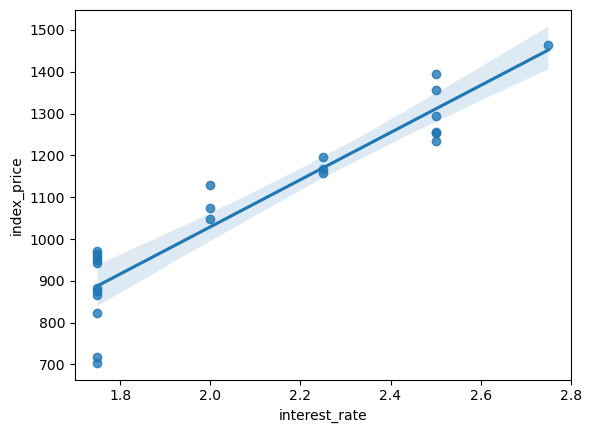

In [33]:
# `Plots the regression line that you can expect when training a linear regression model on the given data
# Need to specify x and y
sns.regplot(x = df["interest_rate"], y = df["index_price"])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

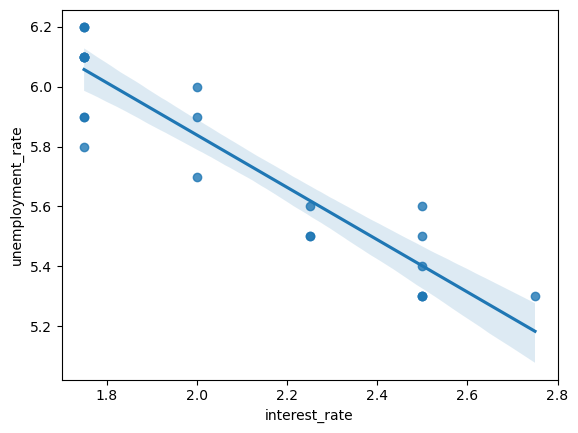

In [34]:
sns.regplot(x = df["interest_rate"], y = df["unemployment_rate"])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

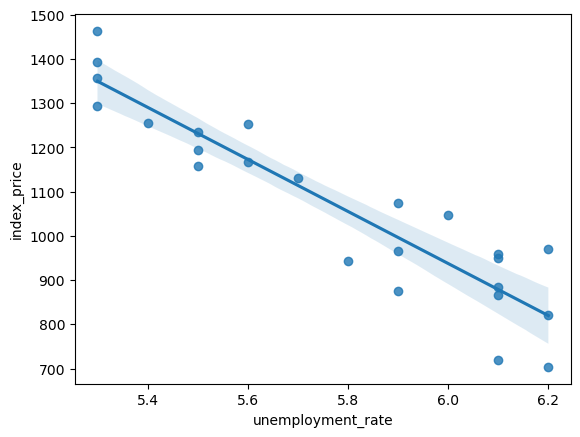

In [35]:
sns.regplot(x = df["unemployment_rate"], y = df["index_price"])

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
regression = LinearRegression()

In [39]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, 
                                   scoring = "neg_mean_squared_error", cv = 3)

In [41]:
validation_score

array([-4304.75412833, -7608.56499271, -5108.77588052])

In [42]:
np.mean(validation_score)

np.float64(-5674.031667186773)

In [43]:
## Prediction
y_pred = regression.predict(X_test)
y_pred

array([1204.14403741,  821.62603274, 1406.38534684,  857.68137178,
        994.85736555])

In [44]:
## Getting the performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_score = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


print(f"MSE: {mse} \nMAE: {mae} \nRMSE: {rmse} \nR^2 Scored: {score} \nAjusted R Squared: {adjusted_score}")

MSE: 6957.10530325883 
MAE: 71.71878409976625 
RMSE: 83.40926389351982 
R^2 Scored: 0.8254940547158576 
Ajusted R Squared: 0.6509881094317151


## Assumptions

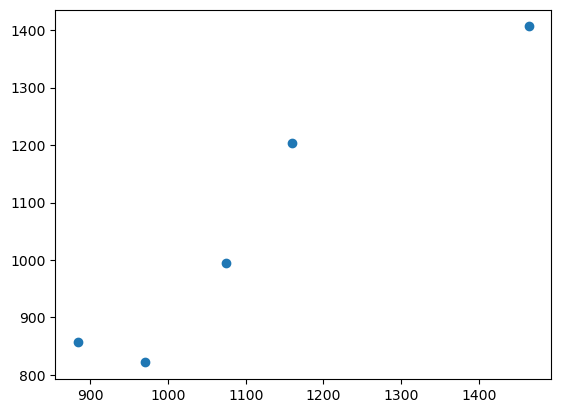

In [45]:
plt.scatter(y_test, y_pred)

In [46]:
residuals  = y_test - y_pred
residuals

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64

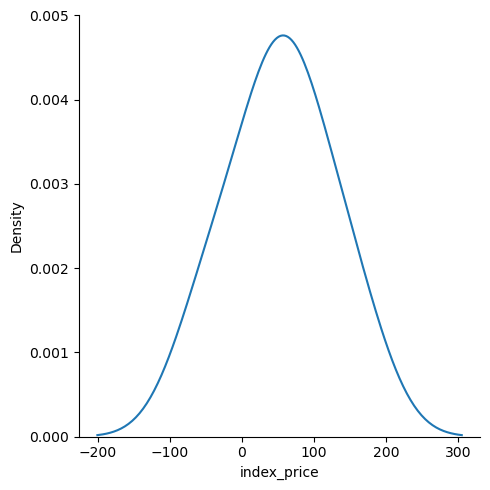

In [47]:
sns.displot(residuals, kind = "kde")
# Data follows a normal distribution which is good

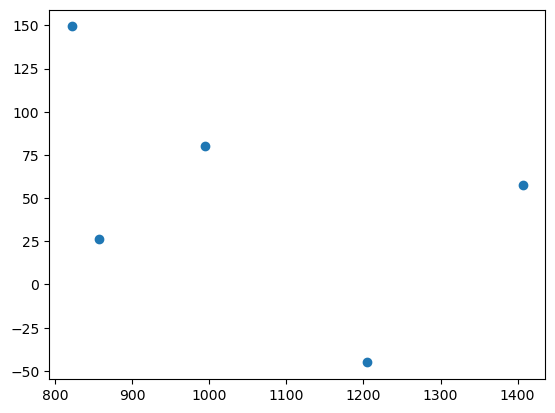

In [48]:
## Scatterplot with respect to predictions and residuals
plt.scatter(y_pred, residuals)
# The data is uniformly distributed, does not follow any patterns which is good
# If it followed a pattern then that would indicate that something is wrong

In [49]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Mon, 22 Dec 2025   Prob (F-statistic):                       0.751
Time:                        18:05:05   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -114.0486    647.232     -0.176      0.862   -1479.588    1251.491
x2            86.6335    647.232      0.134      0.895   -1278.906    1452.173
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.526
Skew:                          -0.369   Prob(JB):                        0.769
Kurtosis:                       2.656   Cond. No.                         4.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
regression.coef_

array([-114.04857249,   86.63351334])

In [52]:
regression.intercept_

np.float64(1059.4210526315792)